<a href="https://www.kaggle.com/code/nasifajwad/eda-on-earthquack-dataset?scriptVersionId=131470142" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**Data Dictionary**

**title**:  title name given to the earthquake <br>
**magnitude**:  The magnitude of the earthquake <br>
**date_time**:  date and time <br>
**cdi**:  The maximum reported intensity for the event range <br>
**mmi**:  The maximum estimated instrumental intensity for the <br>
**alert**:  The alert level - “green”, “yellow”, “orange”, and “red” <br>
**tsunami**:  "1" for events in oceanic regions and "0" otherwise <br>
**sig**:  A number describing how significant the event is. Larger numbers indicate a more significant event. This value is determined on a number of factors, including: magnitude, maximum MMI, felt reports, and estimated impact <br>
**net**:  The ID of a data contributor. Identifies the network considered to be the preferred source of information for this event. <br>
**nst**:  The total number of seismic stations used to determine earthquake location.<br>
**dmin**:  Horizontal distance from the epicenter to the nearest station<br>
**gap**:   largest azimuthal gap between azimuthally adjacent stations (in degrees). In general, the smaller this number, the more reliable is the calculated horizontal position of the earthquake. Earthquake locations in which the azimuthal gap exceeds 180 degrees typically have large location and depth uncertainties<br>
**magType**:  The method or algorithm used to calculate the preferred magnitude for the event<br>
**depth**:  The depth where the earthquake begins to rupture<br>
**latitude / longitude**: coordinate system by means of which the position or location of any place on Earth's surface can be determined and described<br>
**location**:  location within the country<br>
**continent**:  continent of the earthquake hit country<br>
**country**:  affected country<br>

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 


# Reading CSV

In [2]:
eqck_df = pd.read_csv("/kaggle/input/earthquake-dataset/earthquake_data.csv")
eqck_df.head()


,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 7.0 - 18 km SW of Malango, Solomon Islands",7.0,22-11-2022 02:03,8,7,green,1,768,us,117,0.509,17.0,mww,14.000,-9.7963,159.596,"Malango, Solomon Islands",Oceania,Solomon Islands
1,"M 6.9 - 204 km SW of Bengkulu, Indonesia",6.9,18-11-2022 13:37,4,4,green,0,735,us,99,2.229,34.0,mww,25.000,-4.9559,100.738,"Bengkulu, Indonesia",NaN,NaN
2,M 7.0 -,7.0,12-11-2022 07:09,3,3,green,1,755,us,147,3.125,18.0,mww,579.000,-20.0508,-178.346,NaN,Oceania,Fiji
3,"M 7.3 - 205 km ESE of Neiafu, Tonga",7.3,11-11-2022 10:48,5,5,green,1,833,us,149,1.865,21.0,mww,37.000,-19.2918,-172.129,"Neiafu, Tonga",NaN,NaN
4,M 6.6 -,6.6,09-11-2022 10:14,0,2,green,1,670,us,131,4.998,27.0,mww,624.464,-25.5948,178.278,NaN,NaN,NaN


# Checking Dataset Info

In [3]:
eqck_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      782 non-null    object 
 1   magnitude  782 non-null    float64
 2   date_time  782 non-null    object 
 3   cdi        782 non-null    int64  
 4   mmi        782 non-null    int64  
 5   alert      415 non-null    object 
 6   tsunami    782 non-null    int64  
 7   sig        782 non-null    int64  
 8   net        782 non-null    object 
 9   nst        782 non-null    int64  
 10  dmin       782 non-null    float64
 11  gap        782 non-null    float64
 12  magType    782 non-null    object 
 13  depth      782 non-null    float64
 14  latitude   782 non-null    float64
 15  longitude  782 non-null    float64
 16  location   777 non-null    object 
 17  continent  206 non-null    object 
 18  country    484 non-null    object 
dtypes: float64(6), int64(5), object(8)
memory usage: 1

# Checking Total Null Values in Column Attribute

In [4]:
eqck_df.shape
eqck_df.isnull().sum()

title          0
magnitude      0
date_time      0
cdi            0
mmi            0
alert        367
tsunami        0
sig            0
net            0
nst            0
dmin           0
gap            0
magType        0
depth          0
latitude       0
longitude      0
location       5
continent    576
country      298
dtype: int64

# Visualizing Dataset Without Cleaning (Seaborn)

<Axes: >

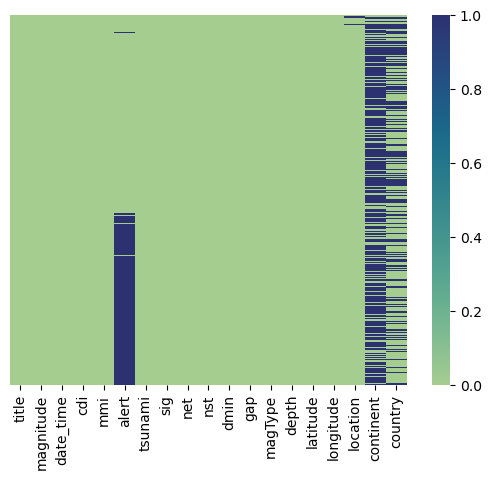

In [5]:
sns.heatmap(eqck_df.isnull(),yticklabels=False,cmap="crest")

# Filling Country & Continent Nan With Location

In [6]:
eqck_df['location'].str.split(pat=',', n=1, expand=True)

,0,1
0,Malango,Solomon Islands
1,Bengkulu,Indonesia
2,NaN,NaN
3,Neiafu,Tonga
4,NaN,NaN
...,...,...
777,Puerto El Triunfo,El Salvador
778,Old Harbor,Alaska
779,Port-Olry,Vanuatu
780,Mindanao,Philippines


In [7]:
country_df = eqck_df['location'].str.split(pat=',', n=1, expand=True)
country_df[1]
eqck_df['country'] = eqck_df['country'].fillna(country_df[1])
eqck_df

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 7.0 - 18 km SW of Malango, Solomon Islands",7.0,22-11-2022 02:03,8,7,green,1,768,us,117,0.509,17.0,mww,14.000,-9.7963,159.596,"Malango, Solomon Islands",Oceania,Solomon Islands
1,"M 6.9 - 204 km SW of Bengkulu, Indonesia",6.9,18-11-2022 13:37,4,4,green,0,735,us,99,2.229,34.0,mww,25.000,-4.9559,100.738,"Bengkulu, Indonesia",NaN,Indonesia
2,M 7.0 -,7.0,12-11-2022 07:09,3,3,green,1,755,us,147,3.125,18.0,mww,579.000,-20.0508,-178.346,NaN,Oceania,Fiji
3,"M 7.3 - 205 km ESE of Neiafu, Tonga",7.3,11-11-2022 10:48,5,5,green,1,833,us,149,1.865,21.0,mww,37.000,-19.2918,-172.129,"Neiafu, Tonga",NaN,Tonga
4,M 6.6 -,6.6,09-11-2022 10:14,0,2,green,1,670,us,131,4.998,27.0,mww,624.464,-25.5948,178.278,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,"M 7.7 - 28 km SSW of Puerto El Triunfo, El Sal...",7.7,13-01-2001 17:33,0,8,NaN,0,912,us,427,0.000,0.0,mwc,60.000,13.0490,-88.660,"Puerto El Triunfo, El Salvador",NaN,El Salvador
778,"M 6.9 - 47 km S of Old Harbor, Alaska",6.9,10-01-2001 16:02,5,7,NaN,0,745,ak,0,0.000,0.0,mw,36.400,56.7744,-153.281,"Old Harbor, Alaska",North America,Alaska
779,"M 7.1 - 16 km NE of Port-Olry, Vanuatu",7.1,09-01-2001 16:49,0,7,NaN,0,776,us,372,0.000,0.0,mwb,103.000,-14.9280,167.170,"Port-Olry, Vanuatu",NaN,Vanuatu
780,"M 6.8 - Mindanao, Philippines",6.8,01-01-2001 08:54,0,5,NaN,0,711,us,64,0.000,0.0,mwc,33.000,6.6310,126.899,"Mindanao, Philippines",NaN,Philippines


# Checking Progress

<Axes: >

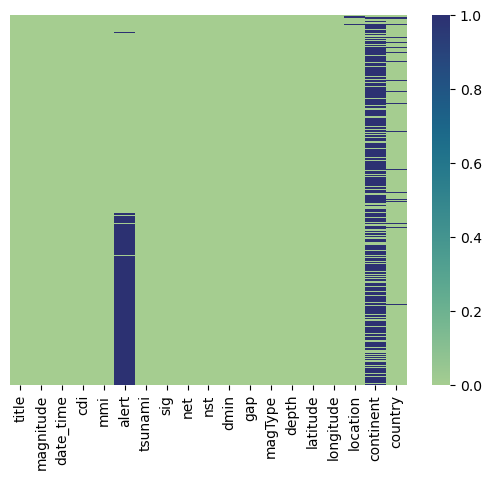

In [8]:
sns.heatmap(eqck_df.isnull(),yticklabels=False,cmap="crest")
# eqck_df[eqck_df['country'].isnull()]


# Visualizing Dataset Without Cleaning (Matplotlib)

<Figure size 1000x600 with 0 Axes>

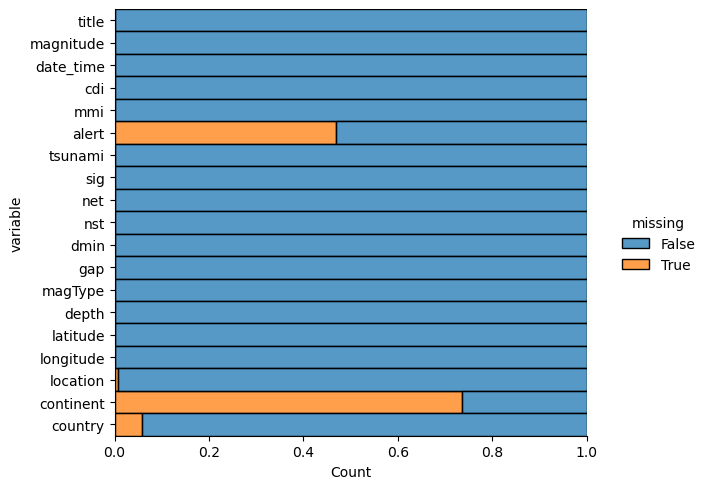

In [9]:
plt.figure(figsize=(10,6))
sns.displot(
    data=eqck_df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)


In [10]:
#droping na values where all three columns are null; storing the df
eqck_df_2=eqck_df.dropna(subset=['country','location','continent'], how='all')

#checking the new data frame
eqck_df_2[eqck_df_2['country'].isnull()]

#number of null value in the country column
eqck_df_2['country'].isnull().sum()

42

In [11]:
# eqck_df_2[eqck_df_2['location'].isnull()]
eqck_df_2['location']=eqck_df_2['location'].fillna('unknown')
eqck_df_2['location'].isnull().sum()


/tmp/ipykernel_21/2818900641.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eqck_df_2['location']=eqck_df_2['location'].fillna('unknown')


0

In [12]:
mask_fiji=(eqck_df_2['location'].str.contains("Fiji")==True) 
eqck_df_2.loc[mask_fiji,'country']=eqck_df_2.loc[mask_fiji,'country'].fillna("Fiji")

mask_krma=(eqck_df_2['location'].str.contains("Kermadec|Macquarie")==True) 
eqck_df_2.loc[mask_krma,'country']=eqck_df_2.loc[mask_krma,'country'].fillna("New Zealand")

mask_nwcl=(eqck_df_2['location'].str.contains("Loyalty")==True) 
eqck_df_2.loc[mask_nwcl,'country']=eqck_df_2.loc[mask_nwcl,'country'].fillna("New Caledonia")

mask_ss=(eqck_df_2['location'].str.contains("South Sandwich")==True) 
eqck_df_2.loc[mask_ss,'country']=eqck_df_2.loc[mask_ss,'country'].fillna("United Kingdom")

mask_okh=(eqck_df_2['location'].str.contains("Okhotsk|Kuril")==True) 
eqck_df_2.loc[mask_okh,'country']=eqck_df_2.loc[mask_okh,'country'].fillna("Russia")

mask_wcns=(eqck_df_2['location'].str.contains("west coast of northern Sumatra")==True) 
eqck_df_2.loc[mask_wcns,'country']=eqck_df_2.loc[mask_wcns,'country'].fillna("Indonesia")

mask_vn=(eqck_df_2['location'].str.contains("Vanuatu region")==True) 
eqck_df_2.loc[mask_vn,'country']=eqck_df_2.loc[mask_vn,'country'].fillna("Vanuatu")

mask_mar=(eqck_df_2['location'].str.contains("Mid-Atlantic Ridge")==True) 
eqck_df_2.loc[mask_mar,'country']=eqck_df_2.loc[mask_mar,'country'].fillna("Iceland")

mask_pe=(eqck_df_2['location'].str.contains("Prince Edward")==True) 
eqck_df_2.loc[mask_pe,'country']=eqck_df_2.loc[mask_pe,'country'].fillna("Canada")

mask_bi=(eqck_df_2['location'].str.contains("Bouvet Island")==True) 
eqck_df_2.loc[mask_bi,'country']=eqck_df_2.loc[mask_bi,'country'].fillna("Norway")

mask_bi=(eqck_df_2['location'].str.contains("Bouvet Island")==True) 
eqck_df_2.loc[mask_bi,'country']=eqck_df_2.loc[mask_bi,'country'].fillna("Philippine")

eqck_df_2['country']=eqck_df_2['country'].fillna('Unspecified')
eqck_df_2['continent']=eqck_df_2['continent'].fillna('Unspecified')

eqck_df_2.isnull().sum()


/tmp/ipykernel_21/2081995780.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eqck_df_2['country']=eqck_df_2['country'].fillna('Unspecified')
/tmp/ipykernel_21/2081995780.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eqck_df_2['continent']=eqck_df_2['continent'].fillna('Unspecified')


title          0
magnitude      0
date_time      0
cdi            0
mmi            0
alert        367
tsunami        0
sig            0
net            0
nst            0
dmin           0
gap            0
magType        0
depth          0
latitude       0
longitude      0
location       0
continent      0
country        0
dtype: int64

**Filling Alert Nan Values**

In [13]:
eqck_df_2['alert'].value_counts()

green     322
yellow     56
orange     22
red        12
Name: alert, dtype: int64

In [14]:
eqck_df_2['magnitude'].value_counts()

6.50    131
6.60    114
6.70     98
6.80     78
6.90     75
7.00     49
7.10     43
7.30     31
7.20     30
7.60     22
7.50     22
7.40     18
7.70     16
7.80     15
7.90      9
8.20      6
8.10      6
8.00      5
8.30      3
8.60      2
9.10      2
8.40      2
8.80      1
8.16      1
Name: magnitude, dtype: int64

In [15]:
eqck_df_2['sig'].value_counts()

650     50
670     40
691     36
711     25
776     18
        ..
742      1
726      1
961      1
1120     1
1441     1
Name: sig, Length: 339, dtype: int64

In [16]:
mask = (eqck_df_2['alert'] == 'red')
eqck_df_2.loc[mask, 'sig'].value_counts()

2910    2
2397    1
2504    1
2331    1
2026    1
2790    1
2840    1
2074    1
2820    1
2015    1
2083    1
Name: sig, dtype: int64

In [17]:
mask = (eqck_df_2['alert'] == 'green')
eqck_df_2.loc[mask, 'sig'].mean()

773.7950310559006

In [18]:
mask = (eqck_df_2['alert'] == 'yellow')
eqck_df_2.loc[mask, 'sig'].mean()

1047.6964285714287

In [19]:
mask = (eqck_df_2['alert'] == 'orange')
eqck_df_2.loc[mask, 'sig'].mean()

1382.1363636363637

In [20]:
mask = (eqck_df_2['alert'] == 'red')
eqck_df_2.loc[mask, 'sig'].mean()

2475.0

In [21]:
mask_red = eqck_df_2.sig>2000
eqck_df_2.loc[mask_red,'alert'] = eqck_df_2.loc[mask_red,'alert'].fillna('red')  

In [22]:
eqck_df_2['alert'].value_counts()

green     322
yellow     56
orange     22
red        13
Name: alert, dtype: int64

In [23]:
mask_orange = eqck_df_2.sig >= 1382
eqck_df_2.loc[mask_orange,'alert'] = eqck_df_2.loc[mask_orange,'alert'].fillna('orange')  

mask_yellow = eqck_df_2.sig >= 1047
eqck_df_2.loc[mask_yellow,'alert'] = eqck_df_2.loc[mask_yellow,'alert'].fillna('yellow')  

mask_green = eqck_df_2.sig < 1047
eqck_df_2.loc[mask_green,'alert'] = eqck_df_2.loc[mask_green,'alert'].fillna('green')  

In [24]:
eqck_df_2['alert'].isnull().value_counts()

False    779
Name: alert, dtype: int64

# Cleaned Dataset(Seaborn)

<Axes: >

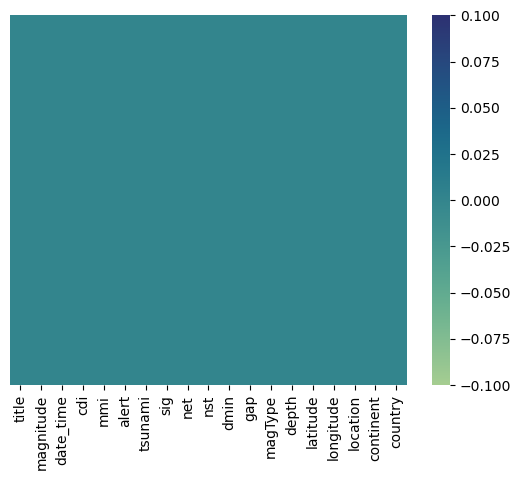

In [25]:
sns.heatmap(eqck_df_2.isna(),yticklabels=False, cmap="crest")

# Cleaned Dataset (Matplotlib)

<Figure size 1000x600 with 0 Axes>

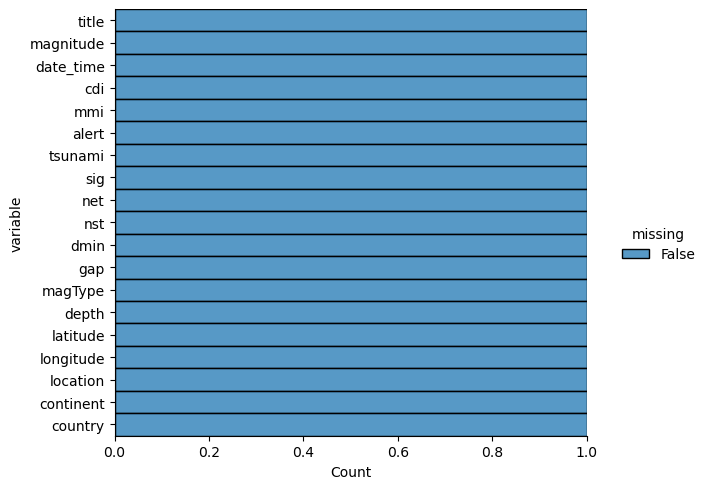

In [26]:
plt.figure(figsize=(10,6))
sns.displot(
    data=eqck_df_2.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot_final.png", dpi=100)

In [27]:
eqck_df_2["date_time"]=pd.to_datetime(eqck_df_2["date_time"]) #converting object to datetime
eqck_df_2["year"]=eqck_df_2["date_time"].dt.year
eqck_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 779 entries, 0 to 781
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   title      779 non-null    object        
 1   magnitude  779 non-null    float64       
 2   date_time  779 non-null    datetime64[ns]
 3   cdi        779 non-null    int64         
 4   mmi        779 non-null    int64         
 5   alert      779 non-null    object        
 6   tsunami    779 non-null    int64         
 7   sig        779 non-null    int64         
 8   net        779 non-null    object        
 9   nst        779 non-null    int64         
 10  dmin       779 non-null    float64       
 11  gap        779 non-null    float64       
 12  magType    779 non-null    object        
 13  depth      779 non-null    float64       
 14  latitude   779 non-null    float64       
 15  longitude  779 non-null    float64       
 16  location   779 non-null    object        
 1

/tmp/ipykernel_21/4267129774.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eqck_df_2["date_time"]=pd.to_datetime(eqck_df_2["date_time"]) #converting object to datetime
/tmp/ipykernel_21/4267129774.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eqck_df_2["year"]=eqck_df_2["date_time"].dt.year


# Data Analysis

In [28]:
px.histogram(eqck_df_2,x="year",title="Number of Earthquake(2001-2022)",text_auto=True).update_layout(xaxis_title="Year",yaxis_title="Earthquake Count")

In [29]:
pd.set_option('display.min_rows', None)
eqck_df_2["country"] = eqck_df_2["country"].str.replace(' ', '')

/tmp/ipykernel_21/1395001802.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [30]:
eqck_df_2["country"].value_counts()

Indonesia                                             122
PapuaNewGuinea                                         64
Japan                                                  62
Chile                                                  49
Vanuatu                                                43
SolomonIslands                                         42
NewZealand                                             31
Russia                                                 28
Mexico                                                 27
Philippines                                            24
Peru                                                   20
Fiji                                                   19
Alaska                                                 19
UnitedStatesofAmerica                                  17
NewCaledonia                                           15
Tonga                                                  12
People'sRepublicofChina                                12
Greece        

In [31]:
px.histogram(eqck_df_2,x="country",title="Number of Earthquake(Country)",text_auto=False).update_layout(font=dict(size=10),xaxis_title="Contries",yaxis_title="Earthquake Count",xaxis={'categoryorder': 'max ascending'})

In [32]:
px.histogram(eqck_df_2,x="magnitude",title="Number of Recorded Magnitude(2001-2022)",text_auto=True).update_layout(font=dict(size=9),xaxis_title="Magnitude",yaxis_title="Magnitude Count",xaxis={'categoryorder': 'max ascending'})

In [33]:
px.histogram(eqck_df_2,x="year",y="tsunami",title="Number of Recorded Tsunami(2001-2022)",text_auto=True).update_layout(font=dict(size=9),xaxis_title="Year",yaxis_title="Number of Tsunami",xaxis={'categoryorder': 'max ascending'})

In [34]:
# mask_tsnmi= eqck_df_2["tsunami"] == 1
px.histogram(eqck_df_2,x="sig",y="tsunami")

In [35]:
px.box(eqck_df_2.loc[eqck_df_2["country"].isin(["Indonesia"])],x="year",y="magnitude",title="Earthquake Magnitude(Indonesia)").update_layout(font=dict(size=9),xaxis_title="Year",yaxis_title="Magnitude",xaxis={'categoryorder': 'max ascending'})

In [36]:
fig = px.scatter_mapbox(eqck_df_2, lat="latitude", lon="longitude", color="magnitude", 
                        mapbox_style="open-street-map", zoom = 0.0, color_continuous_scale = 'RdPu')
fig.show()

In [37]:
fig = px.density_mapbox(eqck_df_2, lat="latitude", lon="longitude", mapbox_style="open-street-map",
                       animation_frame = 'year', zoom = 0.5, radius = 10)
fig.show()